<a href="https://colab.research.google.com/github/DiantoroKadarman/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Global Threeshold

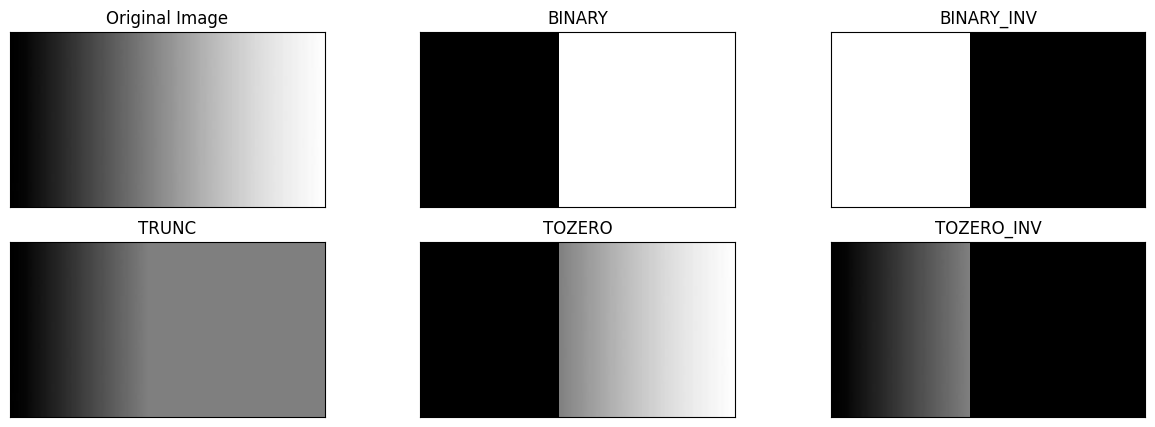

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/drive/MyDrive/PCVK/gradient.png')
img = cv.imread(filename)
thresh = 127
#nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

# Adaptive Threshold

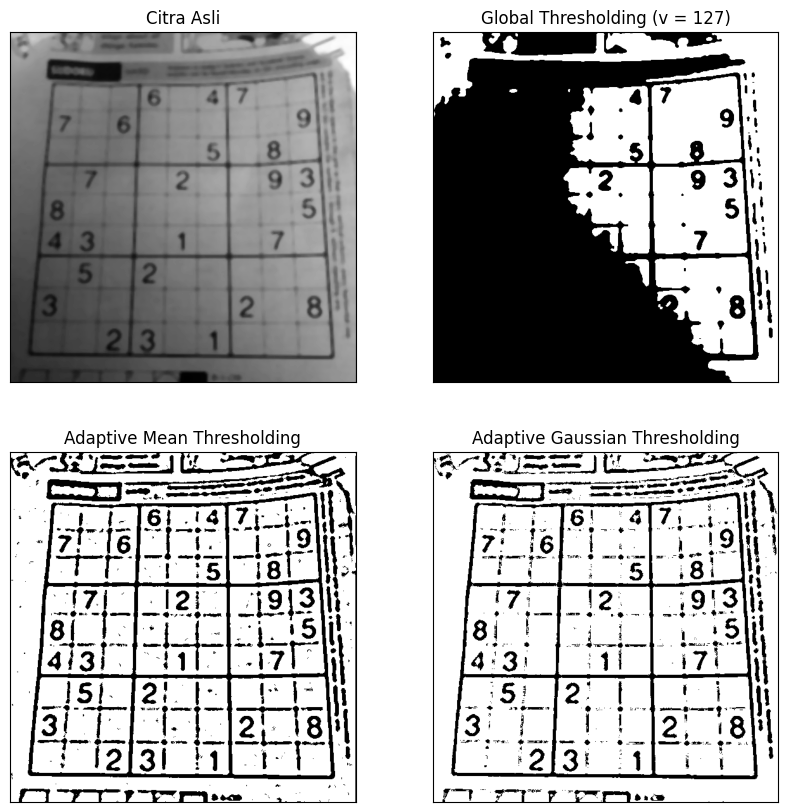

In [7]:
filename = ('/content/drive/MyDrive/PCVK/sudoku-original.png')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)

#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)',  'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()


# Otsu’s Threshold

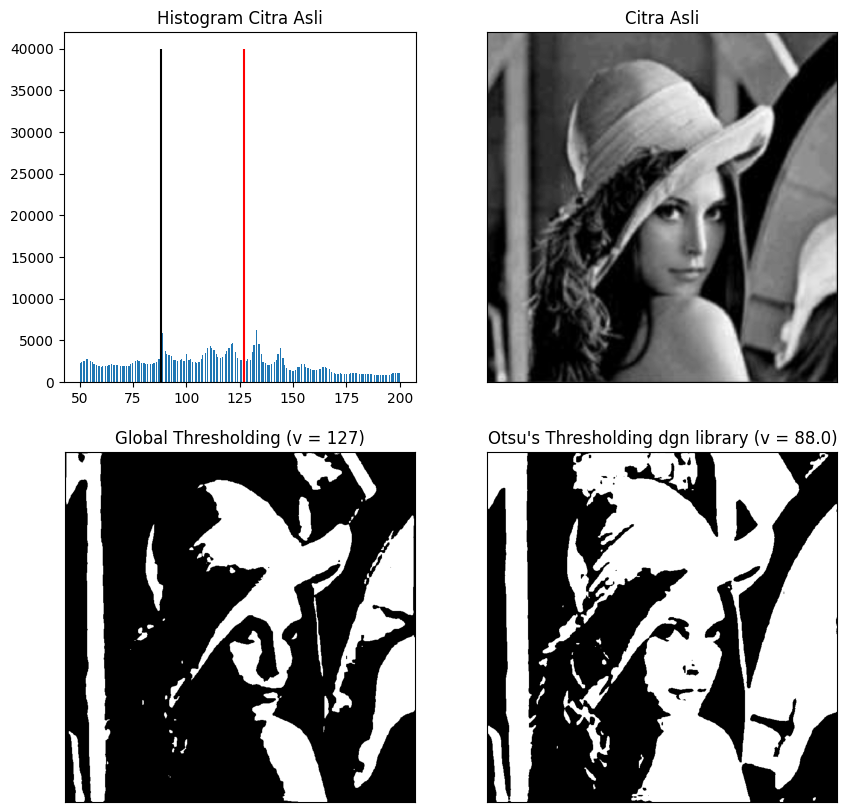

In [13]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/lena_gs_lc2.png')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red')
#garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black')
#garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

# TUGAS PRAKTIKUM

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [14]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

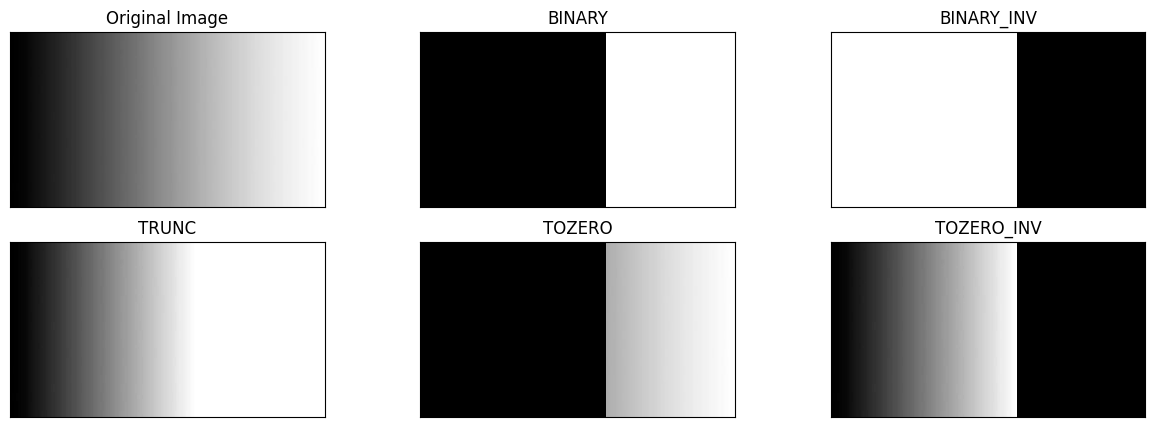

In [17]:
# Load the uploaded image
image_path = '/content/drive/MyDrive/PCVK/gradient.png'
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Threshold value
thresh = 170

# Manually applying global thresholds
# 1. BINARY
binary = np.where(img > thresh, 255, 0).astype(np.uint8)

# 2. BINARY_INV
binary_inv = np.where(img > thresh, 0, 255).astype(np.uint8)

# 3. TRUNC
trunc = np.where(img > thresh, thresh, img).astype(np.uint8)

# 4. TOZERO
tozero = np.where(img > thresh, img, 0).astype(np.uint8)

# 5. TOZERO_INV
tozero_inv = np.where(img > thresh, 0, img).astype(np.uint8)

# Plotting the results
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary, binary_inv, trunc, tozero, tozero_inv]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

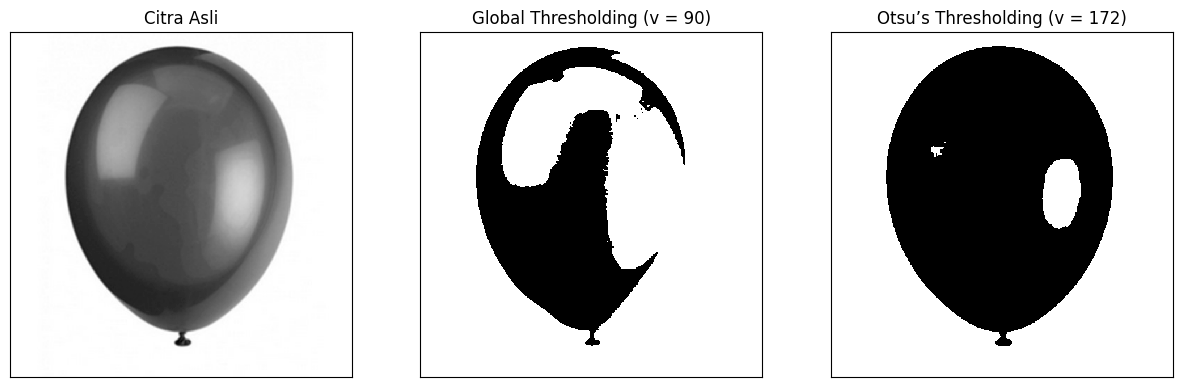

In [20]:
# Load the new image (balloon.jpg)
image_path = '/content/drive/MyDrive/PCVK/balloon.png'
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Apply Global Thresholding
global_thresh_value = 90
_, global_thresh = cv.threshold(img, global_thresh_value, 255, cv.THRESH_BINARY)

# Manually implement Otsu's thresholding
def otsu_thresholding(image):
    # Calculate histogram
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])

    total_pixels = image.shape[0] * image.shape[1]
    sum_all = np.sum([i * hist[i] for i in range(256)])

    sumB = 0
    weightB = 0
    max_variance = 0
    threshold = 0

    weightF = 0
    for i in range(256):
        weightB += hist[i]
        if weightB == 0:
            continue
        weightF = total_pixels - weightB
        if weightF == 0:
            break

        sumB += i * hist[i]
        meanB = sumB / weightB if weightB > 0 else 0
        meanF = (sum_all - sumB) / weightF if weightF > 0 else 0

        between_var = weightB * weightF * (meanB - meanF) ** 2
        if between_var > max_variance:
            max_variance = between_var
            threshold = i

    # Apply threshold
    otsu_thresh_img = np.where(image > threshold, 255, 0).astype(np.uint8)
    return otsu_thresh_img, threshold

# Apply Otsu's Thresholding
otsu_thresh, otsu_value = otsu_thresholding(img)

# Plot the results
titles = ['Citra Asli', f'Global Thresholding (v = {global_thresh_value})', f'Otsu’s Thresholding (v = {otsu_value})']
images = [img, global_thresh, otsu_thresh]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:
*   anda dapat gunakan cv.calcHist untuk menampilkan histogram.
*   Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
*    Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).


6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.